In this notebook, we present a tutorial for using deCS, a in-house tool for automatic cell type annotations for single-cell RNA-seq data. 

In [ ]:
%load_ext rpy2.ipython

Install dependency and deCS from github https://github.com/GuangshengPei/deCS

In [ ]:
%%R
install.packages("reshape2")
install.packages("ggplot2")
install.packages("Seurat")
install.packages("dplyr")
devtools::install_github("GuangshengPei/deCS")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/reshape2_1.4.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 37307 bytes (36 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [ ]:
%%R
library(deCS) 


Check built-in reference annotation panel

In [ ]:
%%R
# BlueprintEncode_main_t_score
data(BlueprintEncode_main)
# BlueprintEncode_fine_t_score
data(BlueprintEncode_fine)
# DICE_main_t_score
data(DICE_main)
# DICE_fine_t_score
data(DICE_fine)
# MonacoImmune_main_t_score
data(MonacoImmune_main)
# MonacoImmune_fine_t_score
data(MonacoImmune_fine)
# Human_cell_landscape (HCL_z_score)
data(Human_cell_landscape)
# Human_cell_atlas_of_fetal (HCAF_z_score)
data(Human_cell_atlas_of_fetal)

  In addition, one can also load the cell type marker gene list from CellMatch database. [(Shao et al., 2020 )](https://www.sciencedirect.com/science/article/pii/S2589004220300663)



In [ ]:
%%R
data(CellMatch)
head(CellMatch_markers)

                       Cell_type Marker_gene
1 1-Cell Stage Cell (Blastomere)       ACCSL
2 1-Cell Stage Cell (Blastomere)      ACVR1B
3 1-Cell Stage Cell (Blastomere)    ARHGEF16
4 1-Cell Stage Cell (Blastomere)       ASF1B
5 1-Cell Stage Cell (Blastomere)     BCL2L10
6 1-Cell Stage Cell (Blastomere)       BLCAP


PBMC dataset from a Healthy Donor 
https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.1.0/pbmc3k

Download Input data

In [ ]:
!mkdir data

In [ ]:
%%R
curl::curl_download("https://github.com/GuangshengPei/deCS/raw/main/Example_data/1.1.PBMC/hg19/barcodes.tsv", "data/barcodes.tsv")
curl::curl_download("https://github.com/GuangshengPei/deCS/raw/main/Example_data/1.1.PBMC/hg19/genes.tsv", "data/genes.tsv")
curl::curl_download("https://github.com/GuangshengPei/deCS/raw/main/Example_data/1.1.PBMC/hg19/matrix.mtx", "data/matrix.mtx")

In [ ]:
%%R
library(Seurat)
library(dplyr)
pbmc.data <- Read10X(data.dir = "data", gene.column=2)

Initialize the Seurat object with the raw data, then conduct standard normalization.

In [ ]:
%%R
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc <- pbmc %>%
  NormalizeData() %>%
  FindVariableFeatures() %>%
  ScaleData() %>%
  RunPCA() 

R[write to console]: Warning:
R[write to console]:  Feature names cannot have underscores ('_'), replacing with dashes ('-')

R[write to console]: Performing log-normalization

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[wri

In [ ]:
%%R
pbmc

An object of class Seurat 
13714 features across 2700 samples within 1 assay 
Active assay: RNA (13714 features, 2000 variable features)
 1 dimensional reduction calculated: pca


Standard cell clustering analysis.

In [ ]:
%%R
pbmc <- FindNeighbors(pbmc, dims = 1:10) 
pbmc <- FindClusters(pbmc, resolution = 0.5)
pbmc <- RunUMAP(pbmc, dims = 1:10) 

R[write to console]: Computing nearest neighbor graph

R[write to console]: Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2700
Number of edges: 97892

Running Louvain algorithm...


R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: 

Maximum modularity in 10 random starts: 0.8719
Number of communities: 9
Elapsed time: 0 seconds


R[write to console]: Warning:
R[write to console]:  The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session

R[write to console]: 02:10:39 UMAP embedding parameters a = 0.9922 b = 1.112

R[write to console]: 02:10:39 Read 2700 rows and found 10 numeric columns

R[write to console]: 02:10:39 Using Annoy for neighbor search, n_neighbors = 30

R[write to console]: 02:10:39 Building Annoy index with metric = cosine, n_trees = 50

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R

Identify cluster specific expressed genes.

In [ ]:
%%R
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
top10 <- pbmc.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
pbmc_top10_markers_list = pbmc.markers[which(pbmc.markers$gene %in% top10$gene),] 

R[write to console]: Calculating cluster 0

R[write to console]: For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=05s  


R[write to console]: Calculating cluster 1



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=10s  


R[write to console]: Calculating cluster 2



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=06s  


R[write to console]: Calculating cluster 3



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=05s  


R[write to console]: Calculating cluster 4



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=06s  


R[write to console]: Calculating cluster 5



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=14s  


R[write to console]: Calculating cluster 6



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=13s  


R[write to console]: Calculating cluster 7



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=14s  


R[write to console]: Calculating cluster 8



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=09s  


Union of marker genes and z-score calculation.


In [ ]:
%%R
pbmc_cluster_average = AverageExpression(pbmc)[[1]]
pbmc_cluster_marker_average = pbmc_cluster_average[which(rownames(pbmc_cluster_average) %in% top10$gene), ]
pbmc_cluster_marker_z_score = t(scale(t(pbmc_cluster_marker_average)))

deCS correlation analysis for expression profiles

R[write to console]: Loading required package: ggplot2



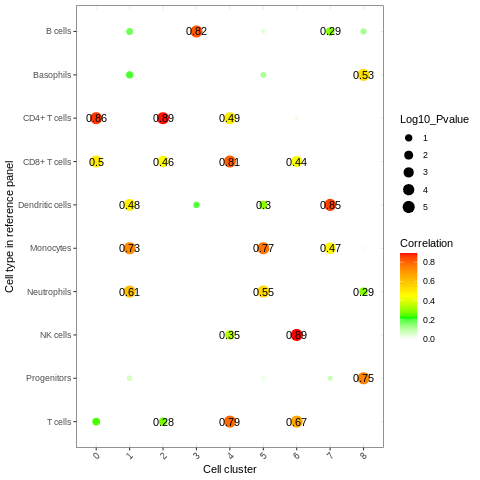

In [ ]:
%%R
head(pbmc_cluster_marker_z_score)
pbmc_deCS_cor_panel_A <- deCS.correlation(pbmc_cluster_marker_z_score, MonacoImmune_main_t_score)


deCS Fisher's exact test for list of genes


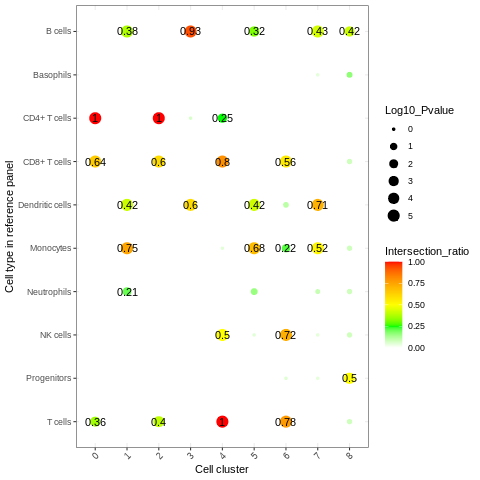

In [ ]:
%%R
head(pbmc_top10_markers_list, 20)
pbmc_deCS_FET_panel_A <- deCS.fisher(pbmc_top10_markers_list, MonacoImmune_main_t_score)


deCS Fisher's exact test for list of genes in CellMatch panel

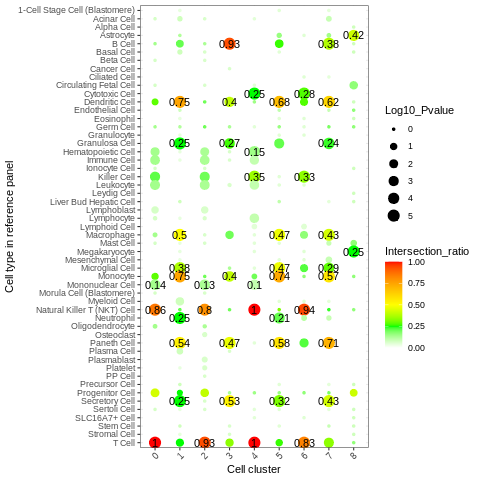

In [ ]:
%%R
pbmc_deCS_FET_CellMatch <- deCS.fisher(pbmc_top10_markers_list, CellMatch_markers, type = "list", p.adjust.methods = "bonferroni", p_threshold = 1e-3, cell_type_threshold = 0.05)
